In [10]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt


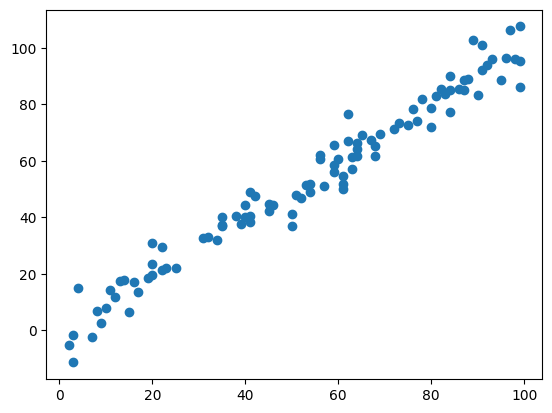

In [7]:
X = np.random.randint(0,100,size=(100))

y = X + np.random.normal(loc=0,scale=5,size=100)
plt.scatter(X,y)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 297.5597
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


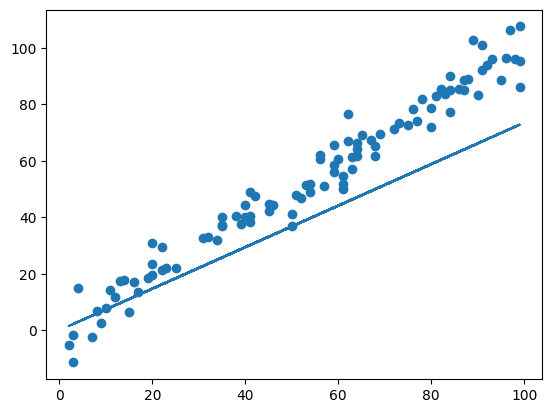

In [14]:
input_tensor = Input(shape=(1,))
output_layer = Dense(1)
output_tensor = output_layer(input_tensor)

model = Model(input_tensor,output_tensor)

model.summary()
mse = MeanSquaredError()
model.compile(loss=mse, optimizer='adam')

model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred)